In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [4]:
df.shape

(200000, 202)

In [5]:
df['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df.drop(['ID_code','target'],axis=1)),
                         columns = df.columns.drop(['ID_code','target']),index = df.ID_code)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df),columns=['PC1','PC2'],index=df.ID_code)

In [10]:
pca_df['target'] = df['target'].values

Text(0.5, 1.0, 'PC1 vs PC2')

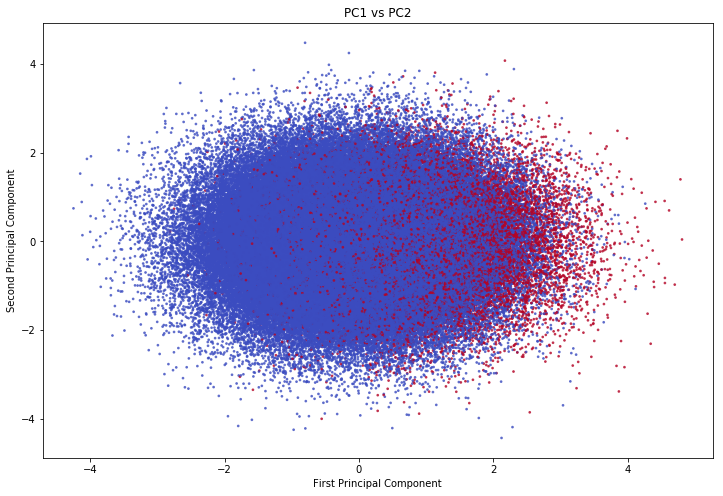

In [11]:
plt.figure(figsize = (12,8))
plt.scatter(pca_df['PC1'],pca_df['PC2'],c=pca_df['target'],cmap='coolwarm',alpha=0.7,s=3)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PC1 vs PC2')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = pca_df.drop('target',axis=1)
y = pca_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
sm = SMOTE(random_state=101, ratio = 1.0)
x_res, y_res = sm.fit_sample(X_train, y_train)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=500,random_state=101)

In [36]:
rfc.fit(x_res,y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [37]:
pred = rfc.predict(X_test)

In [38]:
from sklearn.metrics import auc,confusion_matrix,classification_report

In [46]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     35972
           1       0.19      0.46      0.27      4028

   micro avg       0.75      0.75      0.75     40000
   macro avg       0.56      0.62      0.56     40000
weighted avg       0.85      0.75      0.79     40000



[[28133  7839]
 [ 2177  1851]]


In [49]:
df_test = pd.read_csv('test.csv')

In [61]:
scaler_test = StandardScaler()
scaled_df_test = pd.DataFrame(scaler_test.fit_transform(df_test.drop(['ID_code'],axis=1)),
                         columns = df_test.columns.drop(['ID_code']),index = df_test.ID_code)

In [67]:
pca_test = PCA(n_components=2)
pca_df_test = pd.DataFrame(pca_test.fit_transform(scaled_df_test),columns=['PC1','PC2'],index=df_test.ID_code)

In [74]:
pred_test = rfc.predict(pca_df_test)

In [89]:
submission = pd.DataFrame(pred_test,index=df_test.ID_code)

In [85]:
submission['ID_code'] = df_test['ID_code']
submission.columns = ['target']

In [91]:
submission.to_csv('submission_kaggle.csv')